In [1]:
import os
import warnings

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import seaborn as sns
import pandas as pd
import earthpy as et
import datetime
import matplotlib.ticker
import numpy as np

# Handle data time conversion between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel('ERROR')
warnings.filterwarnings('ignore')

# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

C:\Users\nick.lamkey\Miniconda3\envs\earth-analytics-python\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
path_to_working_directory = os.path.join(et.io.HOME, "earth-analytics", "LCRWS")

if os.path.exists(path_to_working_directory):
    print("Path exists, set as working directory")
    os.chdir(os.path.join(et.io.HOME, "earth-analytics", "LCRWS"))
else:
    print("Path does not exist, creating directories")
    os.mkdir(path_to_working_directory)
    os.chdir(os.path.join(et.io.HOME, "earth-analytics", "LCRWS"))

Path exists, set as working directory


### Open water budget file and get column names

In [3]:
budget_path = os.path.join(path_to_working_directory,'data', "LewisandClark_Redesigned_local.csv")

# For pumping data graph 
pumping_path = os.path.join(path_to_working_directory,'data',"pumping-rates-july.csv")

In [4]:
budget_df = pd.read_csv(budget_path)
budget_df.columns

Index(['time', 'period', 'step', 'zon', 'storage_in', 'ch_in', 'wells_in',
       'river_in', 'hd_in', 'recharge_in', 'other_zones_in', 'total_in',
       'stoarge_out', 'ch_out', 'wells_out', 'river_out', 'hd_out',
       'recharge_out', 'other_zones_out', 'total_out', 'in_out',
       'perecent_error', 'z1_in', 'z2_in', 'z3_in', 'z4_in', 'z5_in', 'z6_in',
       'z7_in', 'z1_out', 'z2_out', 'z3_out', 'z4_out', 'z5_out', 'z6_out',
       'z7_out'],
      dtype='object')

### Do some basic calculations to look at various water budget relationships

In [5]:
budget_df["river_contribution"] = ((budget_df["river_in"])/(budget_df["wells_out"]))-(budget_df['total_in']/budget_df['total_out'])*100
budget_df.sort_values(by=["period","step","zon"],ascending=True)
budget_df.max()
budget_df["river_contribution_2"] = (budget_df["river_in"]/budget_df["total_in"]*100)
budget_df["river_contribution_3"] = (budget_df['river_out']/(budget_df["total_out"]*100))
budget_df["well_contribution"] = (budget_df["wells_out"]/budget_df['total_out']*100)
budget_df["total_contribution"] = budget_df['river_contribution_2']/budget_df["well_contribution"]
budget_df["storage_contribution"] = budget_df['stoarge_out']/budget_df['total_out']
df = budget_df.groupby(['zon']).agg({'river_contribution_2':['mean']})
dg = budget_df.groupby(['zon']).agg({'well_contribution':["mean"]})
dz = budget_df.groupby(['zon']).agg({'river_contribution':['mean']})
dq = budget_df.groupby(['zon']).agg({'river_contribution_3':['mean']})
df,dq


(    river_contribution_2
                     mean
 zon                     
 1.0            69.134677
 2.0            82.129784
 3.0            80.353115
 4.0            80.224938
 5.0            78.396927
 6.0            61.283598,
     river_contribution_3
                     mean
 zon                     
 1.0             0.000232
 2.0             0.000000
 3.0             0.000000
 4.0             0.000000
 5.0             0.000000
 6.0             0.000000)

In [6]:
# Break zones it separate dataframes
budget_list=[]
numbers_list = [1,2,3,4,5,6]
for i in numbers_list:
    df = budget_df[budget_df['zon']==i]
    budget_list.append(df)
budget_list[0]

,time,period,step,zon,storage_in,ch_in,wells_in,river_in,hd_in,recharge_in,...,z4_out,z5_out,z6_out,z7_out,river_contribution,river_contribution_2,river_contribution_3,well_contribution,total_contribution,storage_contribution
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,208000.0,0.0,212.0,...,0.0,0.0,0.0,24600.0,-99.209125,70.508475,0.000237,89.152542,0.790875,0.000000
1,0.1,2.0,1.0,1.0,61.5,0.0,0.0,207000.0,0.0,212.0,...,0.0,0.0,0.0,24600.0,-99.212928,70.169492,0.000236,89.152542,0.787072,0.000046
2,0.2,2.0,2.0,1.0,53.6,0.0,0.0,207000.0,0.0,212.0,...,0.0,0.0,0.0,24600.0,-99.212928,70.169492,0.000236,89.152542,0.787072,0.000047
3,0.3,2.0,3.0,1.0,52.5,0.0,0.0,207000.0,0.0,212.0,...,0.0,0.0,0.0,24600.0,-99.212928,70.169492,0.000236,89.152542,0.787072,0.000049
4,0.4,2.0,4.0,1.0,46.6,0.0,0.0,207000.0,0.0,212.0,...,0.0,0.0,0.0,24600.0,-99.212928,70.169492,0.000236,89.152542,0.787072,0.000052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,30.6,32.0,6.0,1.0,5160.0,0.0,0.0,215000.0,0.0,212.0,...,0.0,0.0,0.0,24500.0,-99.234875,68.690096,0.000219,89.776358,0.765125,0.000009
307,30.7,32.0,7.0,1.0,4590.0,0.0,0.0,215000.0,0.0,212.0,...,0.0,0.0,0.0,24600.0,-99.234875,68.690096,0.000219,89.776358,0.765125,0.000007
308,30.8,32.0,8.0,1.0,4100.0,0.0,0.0,215000.0,0.0,212.0,...,0.0,0.0,0.0,24600.0,-99.234875,68.690096,0.000219,89.776358,0.765125,0.000008
309,30.9,32.0,9.0,1.0,3680.0,0.0,0.0,215000.0,0.0,212.0,...,0.0,0.0,0.0,24600.0,-99.234875,68.690096,0.000219,89.776358,0.765125,0.000008


In [7]:
# Get initial river values for constants
init_river_list=[]
for i in budget_list:
    df = i[i['time']==0]
    value = df['river_in'].values
    init_river_list.append(value[0])
init_river_list

[208000.0, 224000.0, 239000.0, 663000.0, 522000.0, 274000.0]

In [8]:
# subract init values from all other values
corrected_df_list=[]
out_path = os.path.join('corrected_df.csv')
for count, df in enumerate(budget_list):
    
    df['river_corrected'] = (init_river_list[count]-df['river_in'])
    df['river_percentage'] = (df['river_corrected']/df['wells_out'])*100
    temp_df = df
    corrected_df_list.append(temp_df)
    corrected_df=pd.concat(corrected_df_list)
corrected_df.to_csv(out_path)

### Plot up water budget parameters

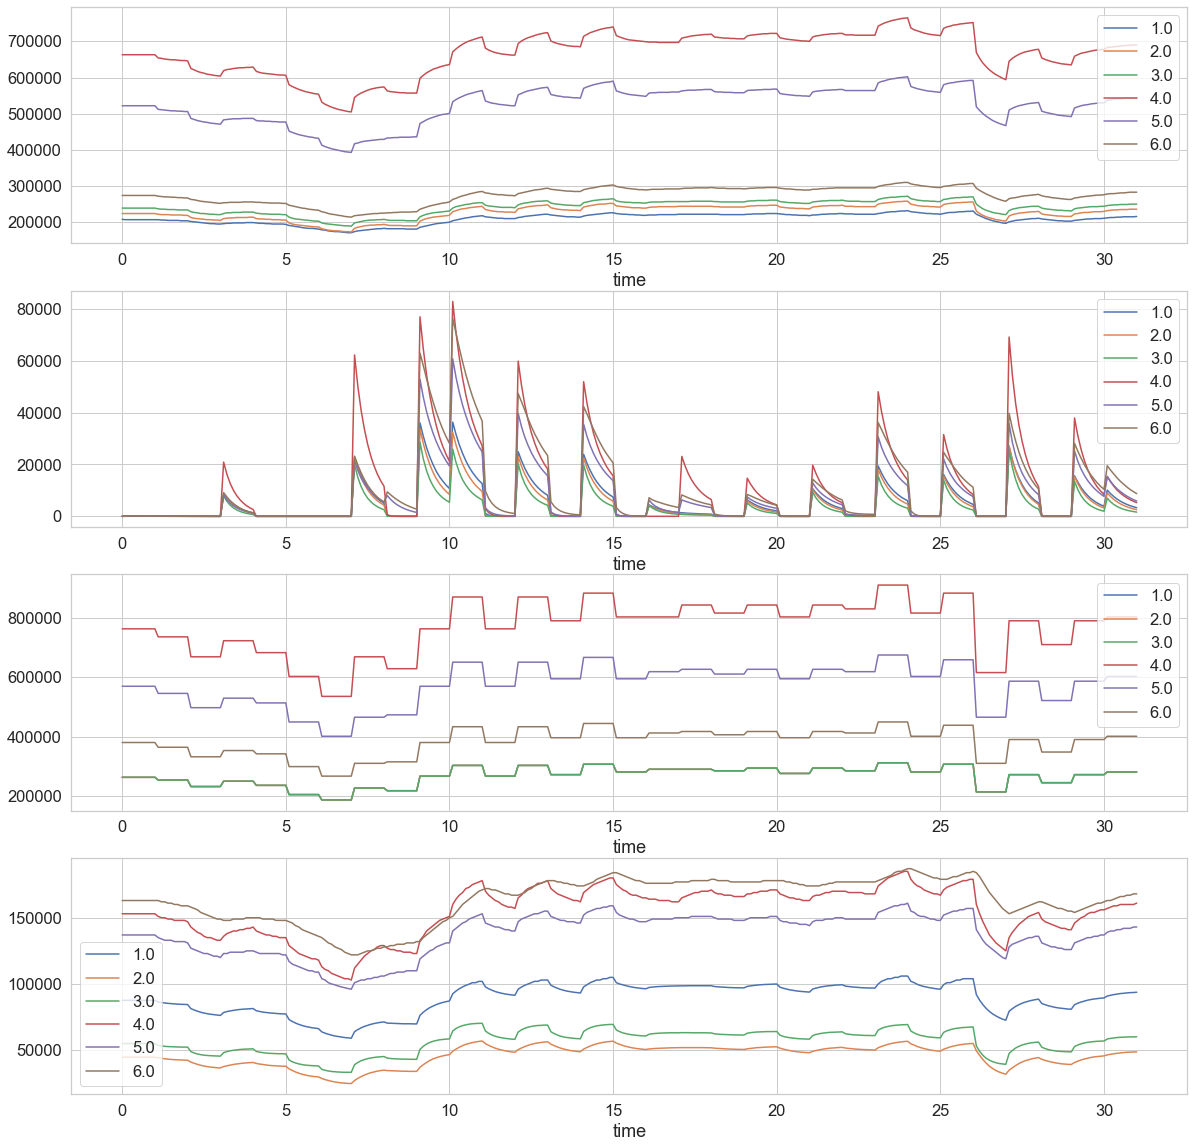

In [9]:
fig, (ax,ax1,ax3,ax4)= plt.subplots(4,1,figsize=(20,20))

for i, k in budget_df.groupby('zon'):
    k.groupby("zon").plot(x="time",
                           y="river_in",
                           label=i,
                           ax=ax)
    
for p, o in budget_df.groupby('zon'):
    o.groupby("zon").plot(x="time",
                          y="storage_in",
                          label=p,
                          ax=ax1)
    
for g, q in budget_df.groupby('zon'):
    q.groupby("zon").plot(x='time',
                          y="wells_out",
                          label=g,
                          ax=ax3)
    
for r, s in budget_df.groupby('zon'):
    s.groupby("zon").plot(x='time',
                          y="other_zones_in",
                          label=r,
                          ax=ax4)

### Plot of river contribution over all wells

In [10]:
# open pumping dtaa to overlay onto river in graph
pump_df = pd.read_csv(pumping_path,
                      parse_dates=['Date'],
                      
                      )
pump_df['Q_MGD'] = pump_df['Q_all_wells']/133680.55419447
pump_df

,Well,Date,Q,Q_all_wells,Q_MGD
0,09-1,2015-07-01,262905.0899,7.887153e+05,5.9
1,09-1,2015-07-02,253993.0530,7.619792e+05,5.7
2,09-1,2015-07-03,231712.9606,6.951389e+05,5.2
3,09-1,2015-07-04,249537.0345,7.486111e+05,5.6
4,09-1,2015-07-05,236168.9791,7.085069e+05,5.3
...,...,...,...,...,...
88,03-1,2015-07-27,155069.4429,7.753472e+05,5.8
89,03-1,2015-07-28,195173.6091,9.758680e+05,7.3
90,03-1,2015-07-29,173784.7205,8.689236e+05,6.5
91,03-1,2015-07-30,195173.6091,9.758680e+05,7.3


### Split pumping dataframe into three seperate dataframes for plotting

In [11]:
# Split pump_df
pump_1 = pump_df[pump_df['Well']==' 03-1']
pump_2 = pump_df[pump_df['Well']==' 07-4']
pump_3 = pump_df[pump_df['Well']==' 09-1']


In [12]:
# Convert River data into MGD
corrected_df['river_MGD'] = corrected_df['river_in']/133680.55419447

In [13]:
pivot = pump_df.pivot(index="Date",columns="Well",values="Q_MGD")
out_path=os.path.join(path_to_working_directory,"pump_pivot.csv")
pivot.to_csv(out_path)
pump_pivot = pd.read_csv(out_path)

## had to split water budget dataframe into same groups as well Groups and add the river inflows for plotting

In [14]:
# Split water budget dataframe into 3 separate dataframes for plotting
groups = [1, 2, 3]
groups2=[1,2,3,4]
group_3= corrected_df[corrected_df.zon.isin(groups)]
group_2 = corrected_df[corrected_df.zon==4]
group_1 = corrected_df[~corrected_df.zon.isin(groups2)]


# Sum Zones for group 3 wells in dataframes
group_13 = group_3[group_3['zon']==1]
group23 = group_3[group_3['zon']==2]
group33 = group_3[group_3['zon']==3]

z1_list = group_13['river_MGD'].values
z2_list = group23['river_MGD'].values
z3_list = group33['river_MGD'].values
time_list = group_13['time'].values
group33['z1_MGD'] = z1_list
group33['z2_MGD'] = z2_list
group33['total_flow'] = group33['river_MGD']+group33['z1_MGD'] +group33['z2_MGD']

# Sum zones for group 3 wells in dataframes
group11 = group_1[group_1['zon']==5]
group22 = group_1[group_1['zon']==6]
z5_list = group11['river_MGD'].values
z6_list = group22['river_MGD'].values

group22['z5_MGD'] = z5_list
group22['total_flow'] = group22['river_MGD'] +group22['z5_MGD']

In [15]:
group22['date'] =pd.to_datetime(group22['time'], unit='d',origin='2015-07-01')
group33['date']=pd.to_datetime(group33['time'], unit='d',origin='2015-07-01')
group_2['date']= pd.to_datetime(group_2['time'], unit='d',origin='2015-07-01')

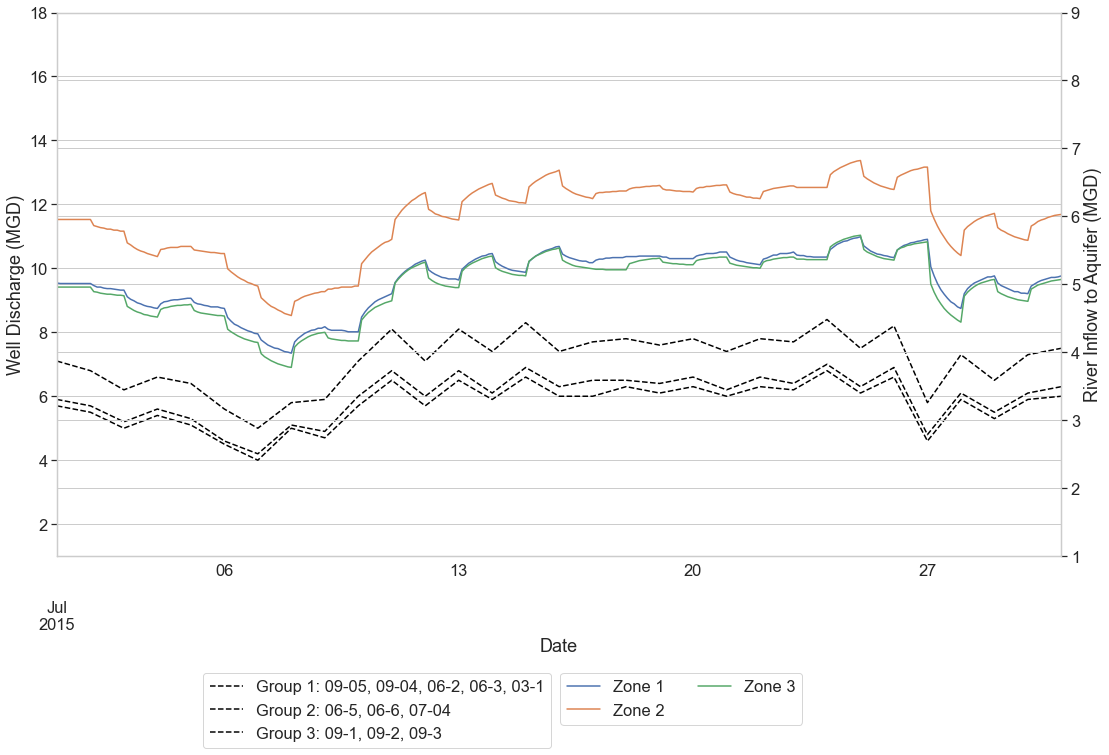

In [16]:
fig, (ax) = plt.subplots(figsize=(18, 10))

colors = ['black', 'bisque', 'lightcoral']
labels = {"Group 1"": " "09-05, 09-04, 06-2, 06-3, 03-1": ['Group 1'],
          "Group 2"": " "06-5, 06-6, 07-04": ['Group 2'],
          "Group 3"": " "09-1, 09-2, 09-3": ['Group 3']
          }
labels2 = {"Zone 1": "1.0",
           "Zone 2": "2.0",
           "Zone 3": "3.0",
           "Zone 4": "4.0",
           "Zone 5": "5.0",
           "Zone 6": "6.0"}

for i, k in pump_df.groupby('Well'):
    k.groupby('Well').plot(x="Date",
                           y='Q_MGD',
                           ax=ax,
                           color=colors,
                           linestyle='--',
                           label=i)
    
ax2 = ax.twinx()
# Group 3
ax2.plot(group33['date'],
        group33['total_flow'])

# Group 1
ax2.plot(group22['date'],
        group22['total_flow'],
        )

# Group 2
ax2.plot(group_2['date'],
        group_2['river_MGD'])
# plt.xticks(rotation=45,ha='right')

ax2.legend(labels=labels2, ncol=2, bbox_to_anchor=(.75, -.2))




# pump_pivot.plot(x="Date",kind='bar',ax=ax2,color=colors,alpha=.5)

ax.legend(labels=labels, bbox_to_anchor=(.5, -.2))

ax.set_ylim(1, 18)
ax2.set_ylim(1, 9)
ax.set_xlabel("Date")
ax2.set_ylabel("River Inflow to Aquifer (MGD)")
ax.set_ylabel("Well Discharge (MGD)")


plt.show()

### Plot grouped zones and wells in three separte graphs for easier viewing

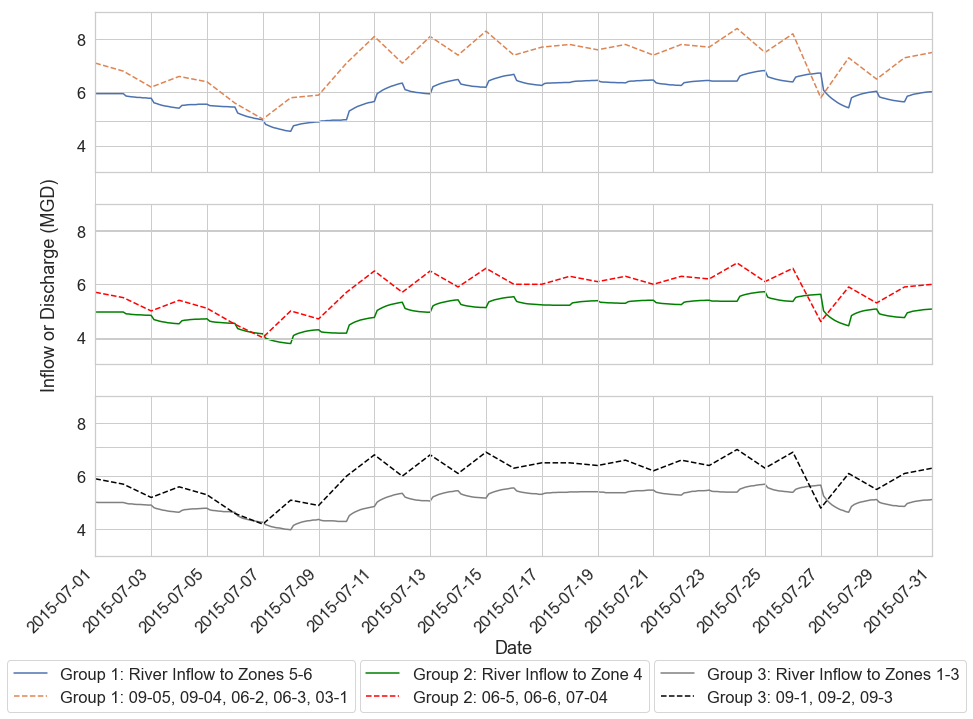

In [28]:
# Define plot variables
labels = {"Group 1"": " "River Inflow to Zones 5-6": ['Group 1'],
          "Group 1"": ""09-05, 09-04, 06-2, 06-3, 03-1": ['Group 1'],
          }
labels2 = {"Group 2"": " "River Inflow to Zone 4": ['Group 2'],
           "Group 2"": " "06-5, 06-6, 07-04": ['Group 2']}
labels3 = {"Group 3"": " "River Inflow to Zones 1-3": ['Group 3'],
           "Group 3"": " "09-1, 09-2, 09-3": ['Group 3']}


# labels2 = {"Zone 1": "1.0",
#            "Zone 2": "2.0",
#            "Zone 3": "3.0",
#            "Zone 4": "4.0",
#            "Zone 5": "5.0",
#            "Zone 6": "6.0"}

fig, (ax, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

# Group 1
ax.plot(group22['date'],
        group22['total_flow'],
        )

ax.plot(pump_1['Date'],
        pump_1['Q_MGD'],
        linestyle='--')

# Group 2
ax2.plot(group_2['date'],
         group_2['river_MGD'],
         color='green',
         )

ax2.plot(pump_2['Date'],
         pump_2['Q_MGD'],
         color='red',
         linestyle='--')

# Group 3
ax3.plot(group33['date'],
         group33['total_flow'],
         color='gray')

ax3.plot(pump_3['Date'],
         pump_3['Q_MGD'],
         color='black',
         linestyle='--')

# Force x axis labels to be in this format
start = datetime.datetime(2015, 7, 1)
end = datetime.datetime(2015, 7, 31)
dates_list = [start + datetime.timedelta(days=x)
              for x in range(0, (end-start).days+1)]
myFmt = mdates.DateFormatter('%Y-%m-%d')
ax.set_xlim(dates_list[0], dates_list[-1])

ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))

ax.legend(labels=labels, bbox_to_anchor=(.32, -3))
ax2.legend(labels=labels2,bbox_to_anchor=(.671, -1.8))
ax3.legend(labels=labels3,bbox_to_anchor=(1.05, -.6))
ax.set_ylim(3, 9)
ax2.set_ylim(3, 9)
ax3.set_ylim(3, 9)


plt.xticks(rotation=45, ha='right')
plt.xlabel("Date")
# Create empty subplot to share common Y axis label
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.ylabel("Inflow or Discharge (MGD)")


plt.tight_layout()
plt.show()

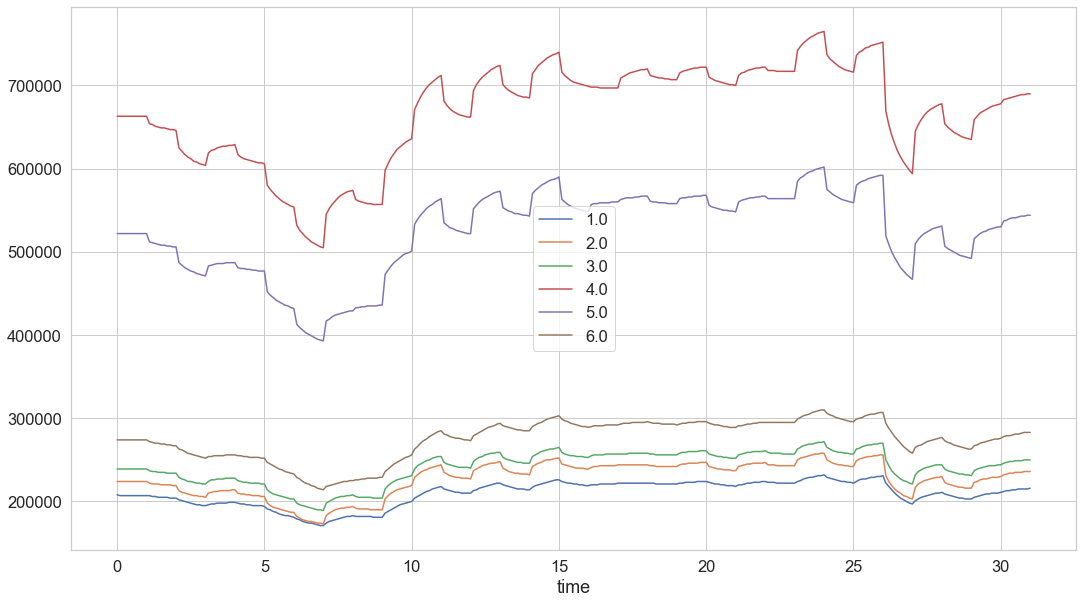

In [18]:
fig, ax = plt.subplots(figsize=(18, 10))
for i, k in budget_df.groupby('zon'):
    k.groupby("zon").plot(x="time",
                          y="river_in",
                          label=i,
                          ax=ax)